___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 100

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male= pd.read_csv("ANSUR II MALE Public.csv")
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")

## Explore Data

In [3]:
df_male.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [4]:
df_female.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
...,...,...,...,...,...
DODRace,2,3,1,2,1
Age,26,21,23,22,45
Heightin,61,64,68,66,63
Weightlbs,142,120,147,175,195


In [5]:
# let's concat them :

df_female.drop(columns="SubjectId", inplace=True)
df_male.drop(columns="subjectid", inplace=True)
# we won't need subject id column. We can drop them before we concat the datasets.

df = pd.concat([df_male, df_female], ignore_index=True)
df.head().T

,0,1,2,3,4
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
...,...,...,...,...,...
DODRace,1,1,2,1,2
Age,41,35,42,31,21
Heightin,71,68,68,66,77
Weightlbs,180,160,205,175,213


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 107 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(98), object(9)
memory usage: 5.0+ MB


In [7]:
df.isnull().sum().any()

True

In [8]:
for col in df:
    if df[col].isnull().sum().any() :
        print(f"{col} = {df[col].isnull().sum()}")
    

Ethnicity = 4647


In [9]:
df.drop(columns="Ethnicity", inplace=True)

In [10]:
df["DODRace"].value_counts()
# 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian,
# 5 = Native American, 6 = Pacific Islander, 8 = Other

# we are interested in the most common three races.

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [11]:
df.drop(index = df[~((df.DODRace == 1)|(df.DODRace == 2)|(df.DODRace == 3))].index, inplace=True)

In [12]:
# Component,Branch, PrimaryMOS: they won't affect the race. But before we drop them, we can look if there is a relation between them.
df.groupby(["Component", "Branch", "PrimaryMOS"])["DODRace"].value_counts()

Component            Branch          PrimaryMOS  DODRace
Army National Guard  Combat Arms     11A         1           27
                                                 2            1
                                     11B         1          304
                                                 2           35
                                                 3           29
                                                           ... 
Regular Army         Combat Support  94A         2            1
                                     94K         1            1
                                     94R         2            1
                                     94W         1            2
                                     94X         1            1
Name: DODRace, Length: 1126, dtype: int64

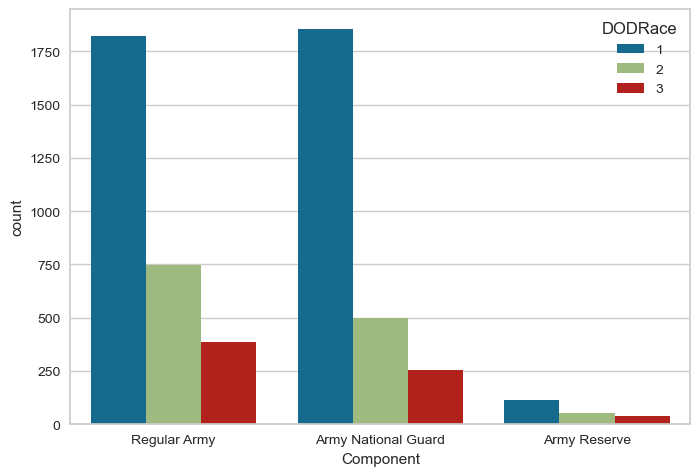

In [13]:
sns.countplot(df.Component, hue=df.DODRace);

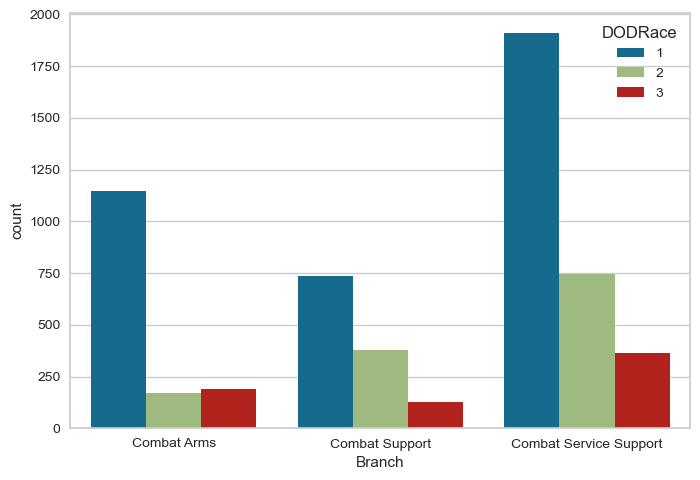

In [14]:
sns.countplot(df.Branch, hue=df.DODRace);

In [15]:
# SubjectNumericRace, Date, Installation, Component, Branch, PrimaryMOS
# These columns does not affect the Race. So we can drop them.
#  Heightin, Weightlbs = these are self reported. we have calculated ones in our dataset. so we can drop them too.
df.drop(columns=["SubjectNumericRace", "Date", "Installation", "Component", "Branch", "PrimaryMOS", "Heightin", "Weightlbs" ], inplace=True)

In [16]:
df.reset_index(drop=True, inplace=True)

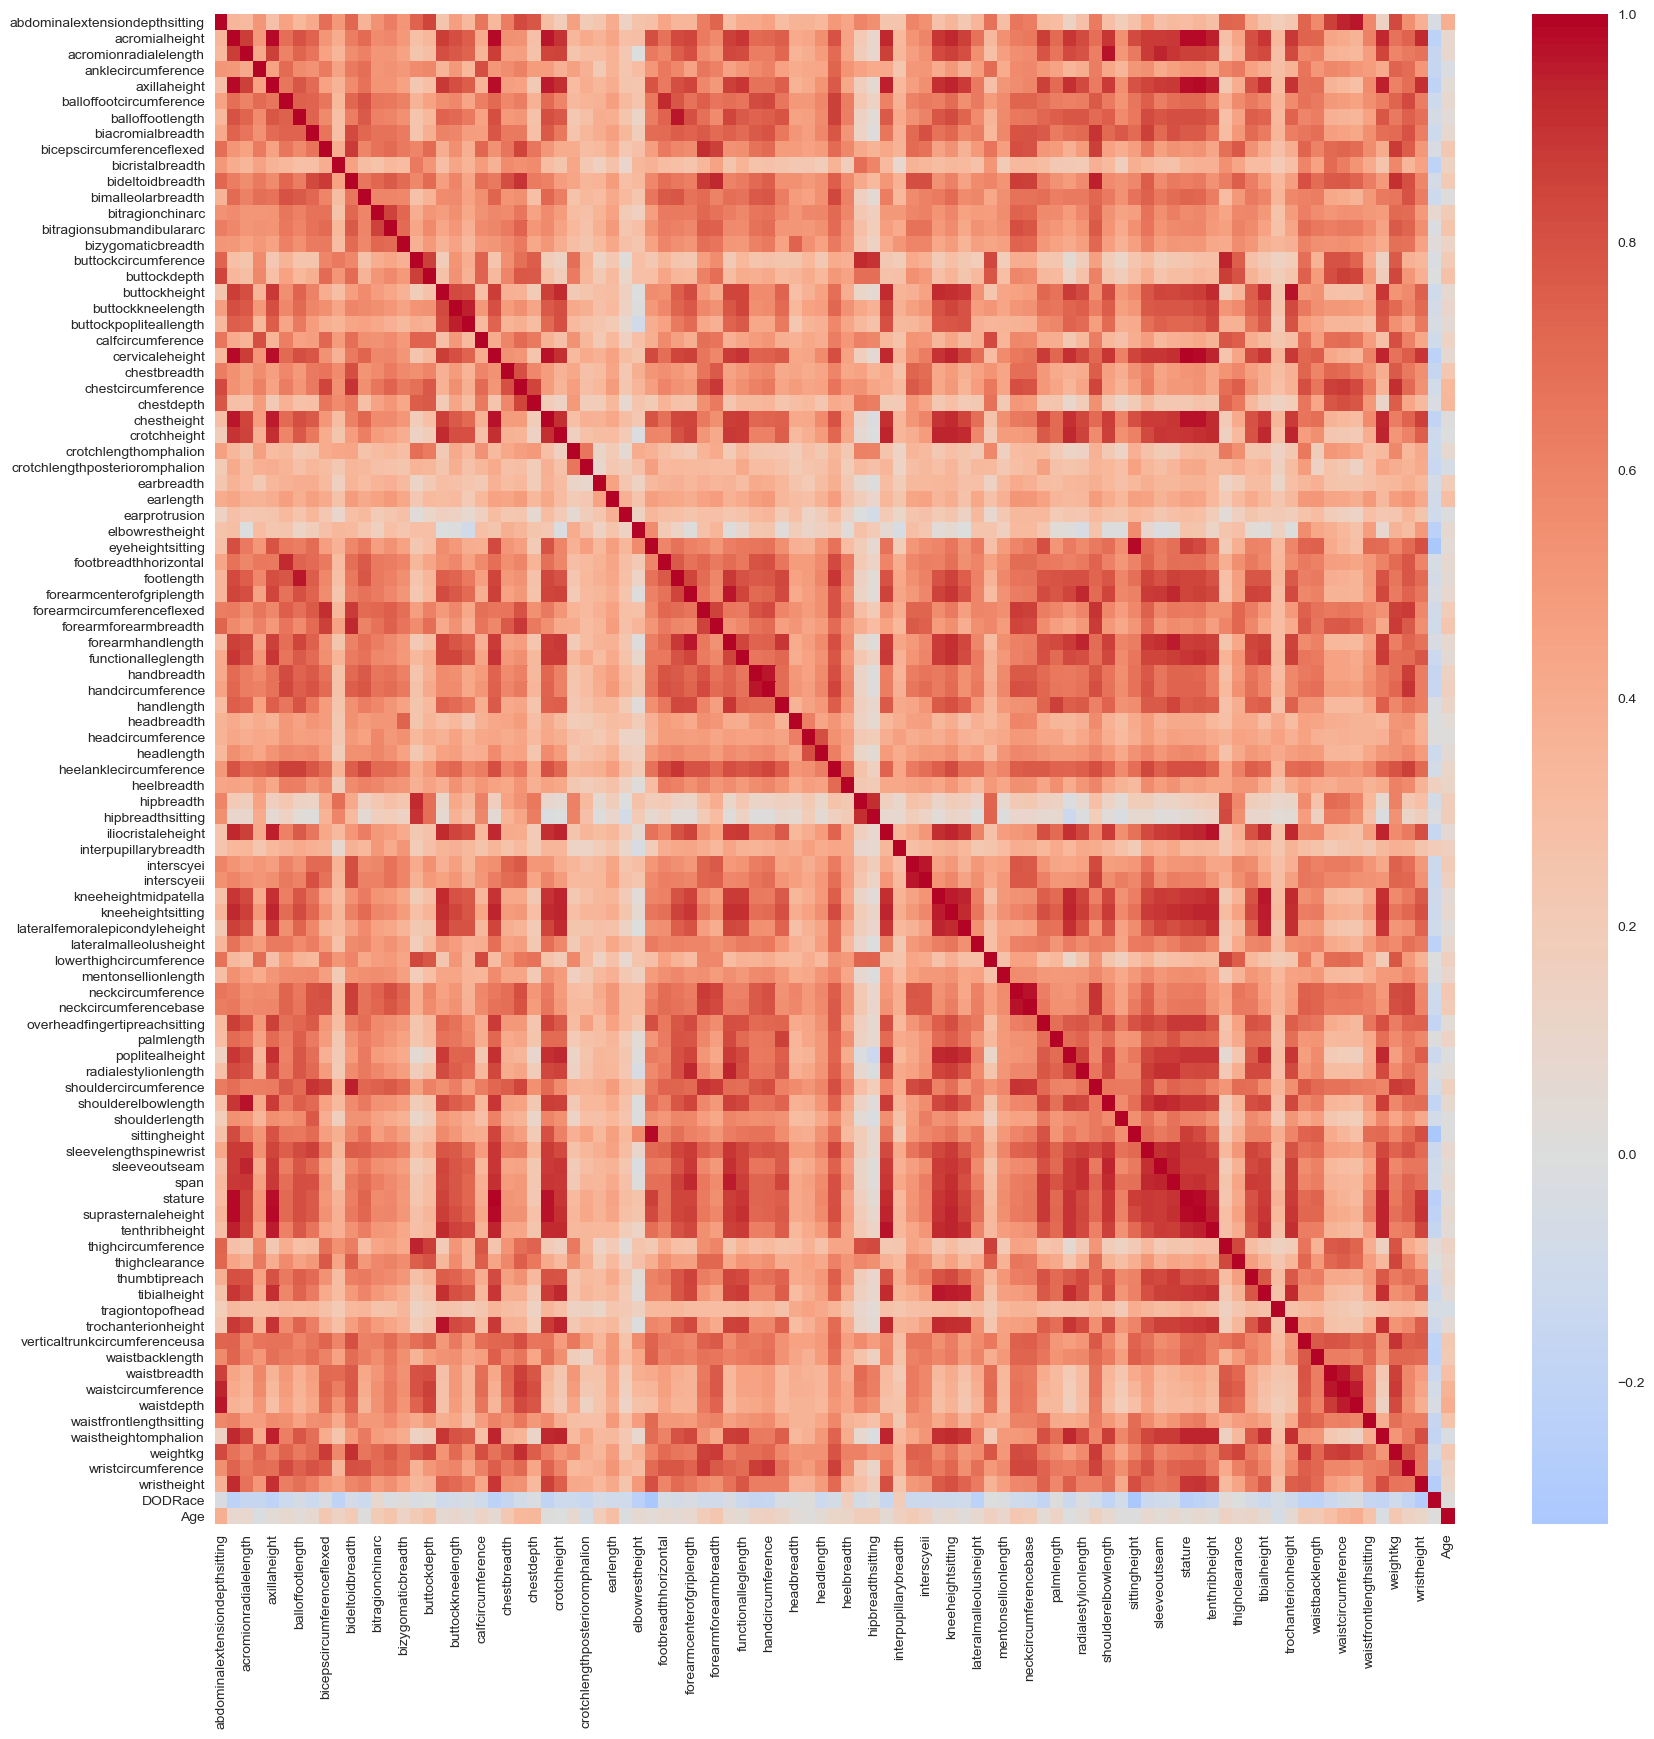

In [17]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), cmap="coolwarm", center=0);

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [18]:
X = df.drop(columns="DODRace")
y = df["DODRace"]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [19]:
X = pd.get_dummies(data=X, drop_first=True)

In [20]:
y[y==1] = "White"
y[y==2] = "Black"
y[y==3] = "Hispanic"

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [22]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [23]:
operations = [("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight= "balanced", max_iter = 10000,random_state=42))]
pipe_log_model = Pipeline(steps=operations)

In [24]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 107  23]
 [ 13  93 652]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   36   31]
 [  21  454   68]
 [  67  356 2611]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [25]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [26]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.604398
test_precision_Hispanic    0.499048
test_recall_Hispanic       0.769933
dtype: float64

### Logistic Model GridsearchCV

In [27]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [28]:
param_grid= {"log__C": [1,5,10],
            "log__penalty": ["l1", "l2"],
            "log__solver": ["liblinear", "lbfgs"]}

In [29]:
log_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=recall_Hispanic, n_jobs=-1, cv=5)

In [30]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [31]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [32]:
log_model_grid.best_score_

0.7640672782874617

In [33]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 107  23]
 [ 13  93 652]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   36   31]
 [  21  454   68]
 [  67  356 2611]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



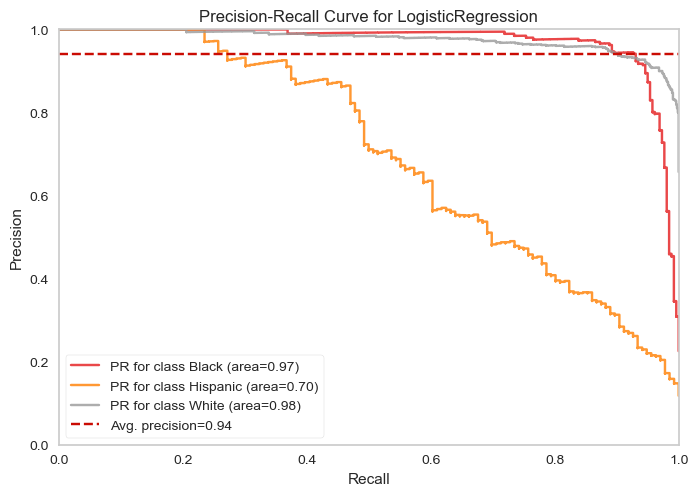

In [34]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [35]:
viz.score_

{'Black': 0.9719147716366068,
 'Hispanic': 0.7003244439382209,
 'White': 0.9758784109856111,
 'micro': 0.9418102085725844}

In [36]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [37]:
# liblinear
operations = [("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42,
                                                                    solver="liblinear", penalty="l1"))]

pipe_log_model_libl = Pipeline(steps=operations)

In [38]:
pipe_log_model_libl.fit(X_train,y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[244   4  12]
 [  8  92  36]
 [ 11  40 707]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93       260
    Hispanic       0.68      0.68      0.68       136
       White       0.94      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 975   14   49]
 [  28  373  142]
 [  49  140 2845]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.71      0.69      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [39]:
scores = cross_validate(pipe_log_model_libl, X_train, y_train, scoring= scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.656079
test_precision_Hispanic    0.680390
test_recall_Hispanic       0.639192
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [40]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced", random_state = 42))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [41]:
pipe_svc_model.fit(X_train,y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  15  10]
 [  6 105  25]
 [ 10 104 644]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.47      0.77      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 957   39   42]
 [  23  444   76]
 [  61  419 2554]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.82      0.61       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.89      0.86      0.87      4615



In [42]:
scores = cross_validate(pipe_svc_model, X_train, y_train, scoring= scoring, cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_f1_Hispanic           0.579695
test_precision_Hispanic    0.466467
test_recall_Hispanic       0.769966
dtype: float64

###  SVC Model GridsearchCV

In [43]:
param_grid = {
    'svc__C': [1,1.5,2],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

svm_model_grid = GridSearchCV(pipe_svc_model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [44]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 1.5, 2],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [45]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [46]:
svm_model_grid.best_score_

0.7807339449541285

In [47]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[237  15   8]
 [  6 107  23]
 [  7  97 654]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93       260
    Hispanic       0.49      0.79      0.60       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.80      0.85      0.81      1154
weighted avg       0.90      0.86      0.88      1154


Train_Set
[[ 969   30   39]
 [  19  455   69]
 [  49  372 2613]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



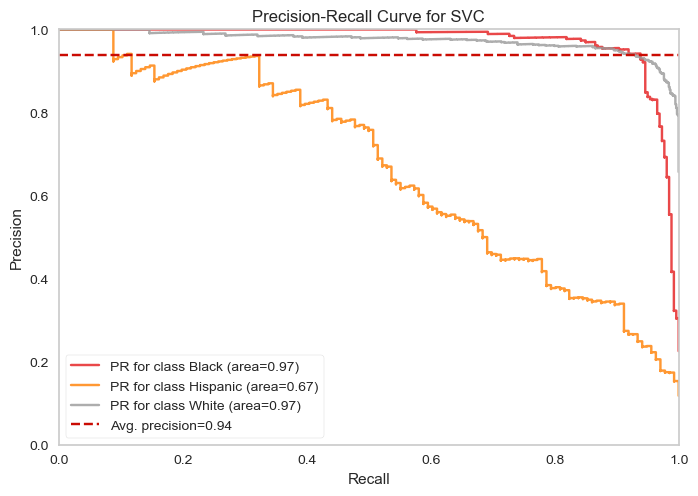

In [48]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [49]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [50]:
from sklearn.preprocessing import OrdinalEncoder
# because in desicion tree models, we don't use get_dummies.

In [51]:
X2 = df.drop(columns="DODRace")
y = df.DODRace

In [52]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [53]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,...,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,...,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,...,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,...,214,379,1245,946,188,954,1.0,90.0,21,2.0


In [54]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [55]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [56]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

In [57]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [58]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[187   0  73]
 [ 10   7 119]
 [ 11   1 746]]
              precision    recall  f1-score   support

       Black       0.90      0.72      0.80       260
    Hispanic       0.88      0.05      0.10       136
       White       0.80      0.98      0.88       758

    accuracy                           0.81      1154
   macro avg       0.86      0.58      0.59      1154
weighted avg       0.83      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [59]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.044808
test_precision_Hispanic    0.450000
test_recall_Hispanic       0.023973
dtype: float64

### RF Model GridsearchCV

In [60]:
param_grid = {'n_estimators':[100, 300, 400],
             'max_depth':[2,4,6,8]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [61]:
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [62]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'n_estimators': [100, 300, 400]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [63]:
rf_grid_model.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [64]:
rf_grid_model.best_score_

0.5967380224260959

In [65]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[175  56  29]
 [ 14  80  42]
 [ 94 260 404]]
              precision    recall  f1-score   support

       Black       0.62      0.67      0.64       260
    Hispanic       0.20      0.59      0.30       136
       White       0.85      0.53      0.66       758

    accuracy                           0.57      1154
   macro avg       0.56      0.60      0.53      1154
weighted avg       0.72      0.57      0.61      1154


Train_Set
[[ 714  222  102]
 [  47  356  140]
 [ 255 1163 1616]]
              precision    recall  f1-score   support

       Black       0.70      0.69      0.70      1038
    Hispanic       0.20      0.66      0.31       543
       White       0.87      0.53      0.66      3034

    accuracy                           0.58      4615
   macro avg       0.59      0.63      0.56      4615
weighted avg       0.75      0.58      0.63      4615



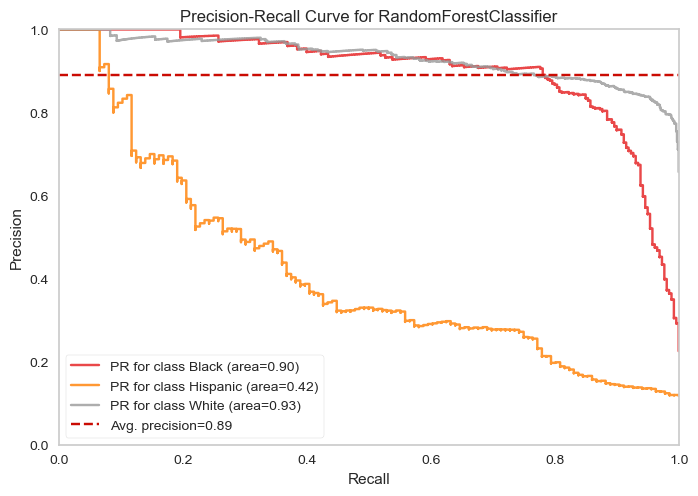

In [66]:
model = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [67]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [68]:
# pip install xgboost==0.90

In [69]:
import xgboost as xgb

In [70]:
xgb_model = XGBClassifier(random_state=42)

In [71]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [72]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [73]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.

XGBClassifier(objective='multi:softprob', random_state=42)

In [74]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[229  11  20]
 [ 10  90  36]
 [ 44 106 608]]
              precision    recall  f1-score   support

       Black       0.81      0.88      0.84       260
    Hispanic       0.43      0.66      0.52       136
       White       0.92      0.80      0.86       758

    accuracy                           0.80      1154
   macro avg       0.72      0.78      0.74      1154
weighted avg       0.84      0.80      0.81      1154


Train_Set
[[ 977   27   34]
 [  15  471   57]
 [  79  323 2632]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93      1038
    Hispanic       0.57      0.87      0.69       543
       White       0.97      0.87      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



In [75]:
scores = cross_validate(xgb_model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.518818
test_precision_Hispanic    0.438450
test_recall_Hispanic       0.636936
dtype: float64

### XGBoost Model GridsearchCV

In [76]:
param_grid = {"n_estimators":[50, 100],
              'max_depth':[1,2],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [77]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)
# I couldn't use n_jobs=-1. It gave an error.

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.8; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.8; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.8; total time=   3.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=1, n_estimators=50, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=1, n_estimators=50, subsample=1; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=1, n_estimators=50, subsample=1; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=1, n_estimators=50, subsample=1; total time=   2.7s
[CV] END colsample_bytree=0.8, l

In [78]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.3,
 'max_depth': 2,
 'n_estimators': 50,
 'subsample': 1}

In [79]:
xgb_grid_model.best_score_

0.6500849473326538

In [80]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[227  14  19]
 [ 12  88  36]
 [ 45 121 592]]
              precision    recall  f1-score   support

       Black       0.80      0.87      0.83       260
    Hispanic       0.39      0.65      0.49       136
       White       0.91      0.78      0.84       758

    accuracy                           0.79      1154
   macro avg       0.70      0.77      0.72      1154
weighted avg       0.83      0.79      0.80      1154


Train_Set
[[ 943   50   45]
 [  29  432   82]
 [ 105  419 2510]]
              precision    recall  f1-score   support

       Black       0.88      0.91      0.89      1038
    Hispanic       0.48      0.80      0.60       543
       White       0.95      0.83      0.89      3034

    accuracy                           0.84      4615
   macro avg       0.77      0.84      0.79      4615
weighted avg       0.88      0.84      0.85      4615



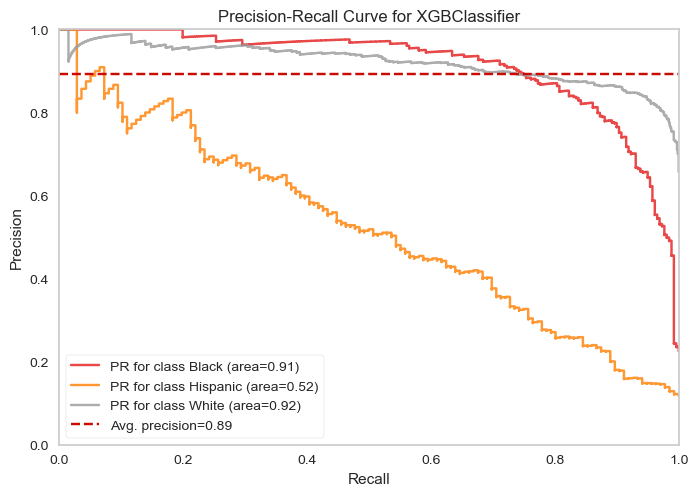

In [81]:
model = XGBClassifier(learning_rate=0.3, max_depth=1,
              random_state=101, subsample=0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [82]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

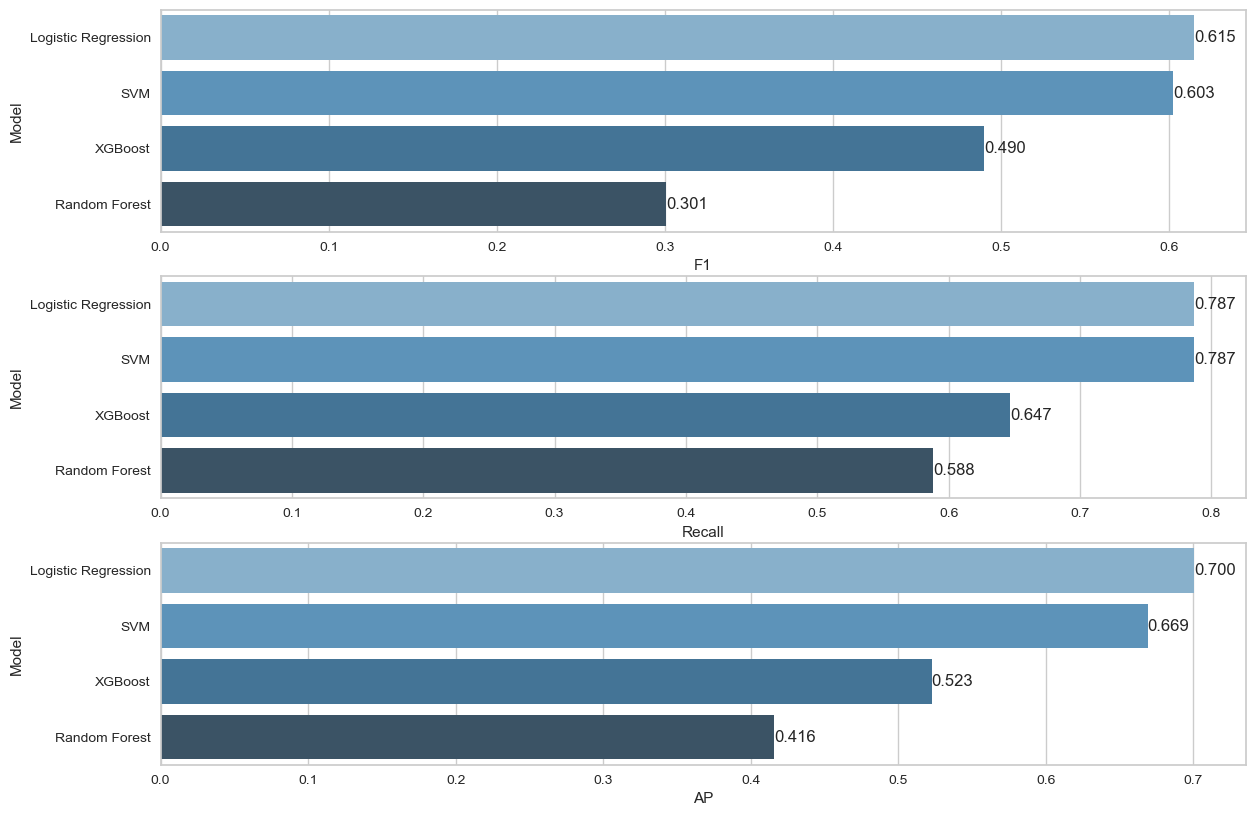

In [83]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Before the Deployment

- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [84]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
final_model = Pipeline(steps=operations)

In [85]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [86]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
count,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,...,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000,5769.000000
mean,247.254290,1408.630265,328.071590,225.201768,1301.902583,244.408043,195.118911,399.706015,341.663027,274.903449,...,0.000173,0.002253,0.019587,0.010574,0.004507,0.017161,0.001213,0.000173,0.107818,0.881955
std,37.457748,78.303123,20.444554,15.965783,71.260913,16.803556,13.379000,30.124094,41.270615,19.239580,...,0.013166,0.047421,0.138590,0.102293,0.066987,0.129881,0.034816,0.013166,0.310177,0.322689
min,155.000000,1146.000000,249.000000,156.000000,1062.000000,186.000000,151.000000,283.000000,216.000000,197.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,220.000000,1353.000000,314.000000,214.000000,1252.000000,233.000000,186.000000,377.000000,312.000000,262.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,243.000000,1412.000000,328.000000,225.000000,1304.000000,245.000000,196.000000,404.000000,342.000000,274.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,272.000000,1464.000000,342.000000,235.000000,1351.000000,256.000000,205.000000,422.000000,370.000000,288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.000000,245.000000,489.000000,490.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
# Let's try our model with an imaginary human with the mean values of the features.

mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting      247.254290
acromialheight                     1408.630265
acromionradialelength               328.071590
anklecircumference                  225.201768
axillaheight                       1301.902583
                                      ...     
SubjectsBirthLocation_Wisconsin       0.017161
SubjectsBirthLocation_Wyoming         0.001213
SubjectsBirthLocation_Zambia          0.000173
WritingPreference_Left hand           0.107818
WritingPreference_Right hand          0.881955
Name: mean, Length: 232, dtype: float64

In [88]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [89]:
# what about the soldier in the index 201?

y[201]

'Hispanic'

In [90]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

- Evaluation metrics

In [91]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7895083688635766

In [92]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7808571214712837

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [93]:
from imblearn.over_sampling import SMOTE  # is for increasing the number of samples to correct the imbalance.
from imblearn.under_sampling import RandomUnderSampler  # is for decreasing the number of samples.
from imblearn.pipeline import Pipeline

In [94]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [95]:
X_over.shape

(9102, 232)

In [96]:
y_over.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

In [97]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [98]:
X_under.shape

(1629, 232)

In [99]:
y_under.value_counts()

Hispanic    543
White       543
Black       543
Name: DODRace, dtype: int64

In [100]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [101]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [102]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [103]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [104]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [105]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = Pipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [106]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [107]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [108]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=42))]

In [109]:
smote_pipeline = Pipeline(steps=operations)

In [110]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=42))])

In [111]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[235  14  11]
 [  6  89  41]
 [  5  37 716]]
              precision    recall  f1-score   support

       Black       0.96      0.90      0.93       260
    Hispanic       0.64      0.65      0.64       136
       White       0.93      0.94      0.94       758

    accuracy                           0.90      1154
   macro avg       0.84      0.83      0.84      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 956   23   59]
 [  26  349  168]
 [  27  127 2880]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.70      0.64      0.67       543
       White       0.93      0.95      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.84      0.85      4615
weighted avg       0.90      0.91      0.91      4615



In [112]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.621247
test_precision_Hispanic    0.651570
test_recall_Hispanic       0.596599
dtype: float64

In [ ]:
# The model without over and under sampling is better.

## SVC Over/Under Sampling

In [113]:
operations_svc = [('o', over), ('u', under), ("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=42))]
smote_pipeline = Pipeline(steps=operations_svc)

In [114]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('svc', SVC(C=2, class_weight='balanced', random_state=42))])

In [115]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  6 100  30]
 [ 11  70 677]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93       260
    Hispanic       0.55      0.74      0.63       136
       White       0.95      0.89      0.92       758

    accuracy                           0.88      1154
   macro avg       0.81      0.85      0.83      1154
weighted avg       0.90      0.88      0.89      1154


Train_Set
[[ 976   25   37]
 [  26  416  101]
 [  53  261 2720]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.59      0.77      0.67       543
       White       0.95      0.90      0.92      3034

    accuracy                           0.89      4615
   macro avg       0.82      0.87      0.84      4615
weighted avg       0.90      0.89      0.90      4615



In [116]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.606391
test_precision_Hispanic    0.549464
test_recall_Hispanic       0.679630
dtype: float64

In [ ]:
# even though the logistic model has better scoes than svm, svm with over-under-sampling has better scores than logistic model with over-under-sampling.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [117]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7895083688635766

In [118]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7808571214712837

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [120]:
import shap
# we use it to discover the most important features for our dataset and target label. 
# Therefore we can decrease the number of features.

In [121]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='saga')

In [123]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[239  12   9]
 [  7 103  26]
 [ 16  93 649]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.50      0.76      0.60       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 969   38   31]
 [  18  452   73]
 [  77  350 2607]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



In [124]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga'))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.602254
test_precision_Hispanic    0.500979
test_recall_Hispanic       0.760707
dtype: float64

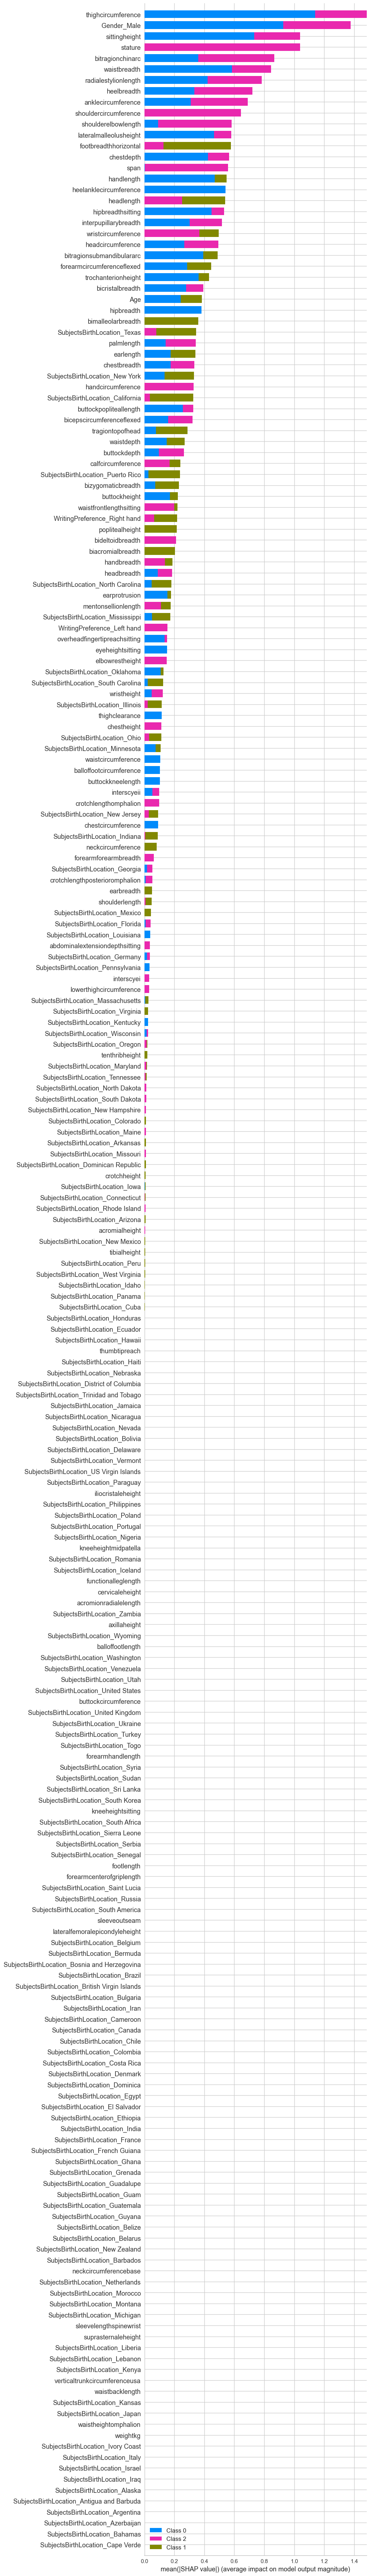

In [125]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, max_display=300,feature_names = X.columns)

In [126]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [128]:
X3 = df[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [129]:
X3.shape

(5769, 154)

In [130]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42, stratify =y)

In [131]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [133]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [134]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[206  21  33]
 [ 11 102  23]
 [ 79 120 559]]
              precision    recall  f1-score   support

       Black       0.70      0.79      0.74       260
    Hispanic       0.42      0.75      0.54       136
       White       0.91      0.74      0.81       758

    accuracy                           0.75      1154
   macro avg       0.67      0.76      0.70      1154
weighted avg       0.80      0.75      0.77      1154


Train_Set
[[ 875   43  120]
 [  30  431   82]
 [ 391  500 2143]]
              precision    recall  f1-score   support

       Black       0.68      0.84      0.75      1038
    Hispanic       0.44      0.79      0.57       543
       White       0.91      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.78      0.70      4615
weighted avg       0.80      0.75      0.76      4615



In [135]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.544538
test_precision_Hispanic    0.429114
test_recall_Hispanic       0.747946
dtype: float64

In [ ]:
# log_recall = 0.787
# the recall score decreased. But if we need to save time, we can use this.

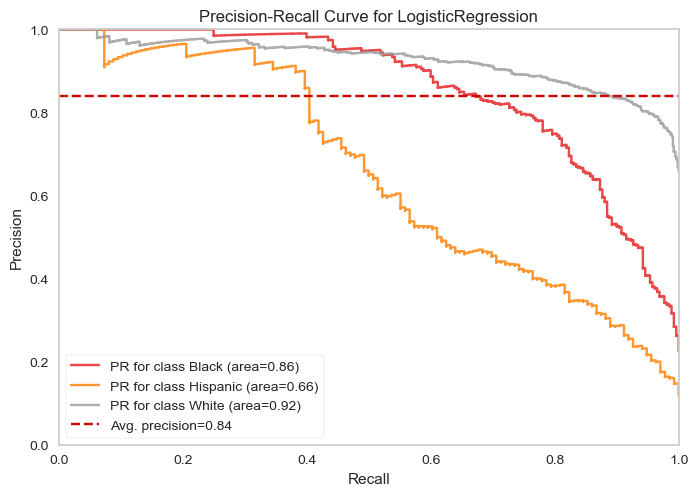

In [136]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

In [ ]:
# import pickle
# pickle.dump(pipe_log_model, open("final_model_soldier_race", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___